In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv(r'..\data\raw\gold_price_dataset.csv', index_col='Date', parse_dates=True)
data = df[['Close']].copy()

In [4]:
data['MA_15'] = data['Close'].rolling(window=15).mean()
data['MA_60'] = data['Close'].rolling(window=60).mean()

In [5]:
data['Lag_1'] = data['Close'].shift(1)
data['Lag_2'] = data['Close'].shift(2)
data['Lag_7'] = data['Close'].shift(7)

data['Volatility_30'] = data['Close'].rolling(window=30).std()
data['Pct_Change'] = data['Close'].pct_change()

In [6]:
print("Number of NaN: ", data.isna().sum())

Number of NaN:  Close             0
MA_15            14
MA_60            59
Lag_1             1
Lag_2             2
Lag_7             7
Volatility_30    29
Pct_Change        1
dtype: int64


In [7]:
data.dropna(inplace=True)

print("Data after clearning: ", data.shape)
print(data.head())

Data after clearning:  (2705, 8)
                  Close        MA_15        MA_60        Lag_1        Lag_2  \
Date                                                                          
2015-03-30  1198.500000  1179.606665  1226.410000  1199.800049  1213.699951   
2015-03-31  1190.099976  1181.053328  1226.336666  1198.500000  1199.800049   
2015-04-01  1208.199951  1184.133325  1226.358331  1190.099976  1198.500000   
2015-04-02  1205.699951  1187.146655  1226.119997  1208.199951  1190.099976   
2015-04-06  1224.199951  1191.479989  1226.203330  1205.699951  1208.199951   

                  Lag_7  Volatility_30  Pct_Change  
Date                                                
2015-03-30  1171.599976      21.958201   -0.001084  
2015-03-31  1185.400024      20.663123   -0.007009  
2015-04-01  1188.000000      20.609161    0.015209  
2015-04-02  1193.000000      20.123269   -0.002069  
2015-04-06  1199.199951      20.610419    0.015344  


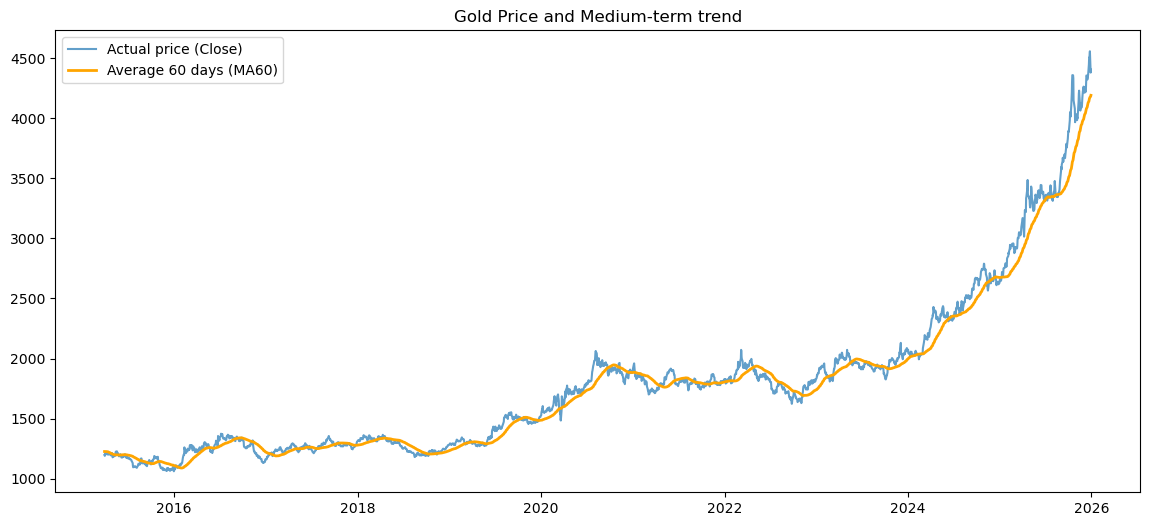

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Close'], label='Actual price (Close)', alpha=0.7)
plt.plot(data.index, data['MA_60'], label='Average 60 days (MA60)', color='orange', linewidth=2)
plt.title('Gold Price and Medium-term trend')
plt.legend()
plt.show()


In [9]:
data.to_csv(r'..\data\raw\gold_price_featured_dataset.csv')